<a href="https://colab.research.google.com/github/Lukerabr/Colab/blob/main/Atividade_IA_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
################################################################################################################################
#                                                  CODIGO A HILL CLIMBING
################################################################################################################################


from heapq import heappush, heappop
import copy

def printPuzzle(s):
    for v in s:
        print(v)

def son2str(s):
    s1 = s[0]+s[1]+s[2]
    return ''.join([str(v) for v in s1])

def valid(x,y):
    r = True
    if x < 0 : r = False
    if x > 2 : r = False
    if y < 0 : r = False
    if y > 2 : r = False
    return r

def sons(s):
    r = []
    x = None
    y = None
    #localiza zero
    for i in range(len(s)):
        for j in range(len(s[i])):
            if s[i][j] == 0:
                x = i
                y = j
    # cima
    vx = x - 1
    vy = y
    if (valid(vx,vy)):
        ts = copy.deepcopy(s)
        t = ts[vx][vy]
        ts[vx][vy] = ts[x][y]
        ts[x][y] = t
        r.append(ts)
    # baixo
    vx = x + 1
    vy = y
    if (valid(vx,vy)):
        ts = copy.deepcopy(s)
        t = ts[vx][vy]
        ts[vx][vy] = ts[x][y]
        ts[x][y] = t
        r.append(ts)

    # direita
    vx = x 
    vy = y +1
    if (valid(vx,vy)):
        ts = copy.deepcopy(s)
        t = ts[vx][vy]
        ts[vx][vy] = ts[x][y]
        ts[x][y] = t
        r.append(ts)

    # esquerda
    vx = x 
    vy = y - 1
    if (valid(vx,vy)):
        ts = copy.deepcopy(s)
        t = ts[vx][vy]
        ts[vx][vy] = ts[x][y]
        ts[x][y] = t
        r.append(ts)
    
    return r



#teste
estadoInicialTeste = [[4,1,3],[2,5,6],[0,7,8]]
#5 movimentos
estadoInicial_5mov = [[4,1,3],[0,2,5],[7,8,6]]
#10 movimentos
estadoInicial_10mov = [[4,1,0],[7,2,3],[8,6,5]]
#15 movimentos
estadoInicial_15mov = [[4,2,1],[0,6,3],[7,8,5]]
#20 movimentos
estadoInicial_20mov = [[4,2,0],[6,8,1],[7,5,3]]
#25 movimentos 
estadoInicial_25mov = [[6,4,2],[7,8,1],[5,0,3]]

# Estado final #
estadoFinal  = [[1,2,3],[4,5,6],[7,8,0]]

def h1(estadoInicial, estadoFinal): # posições erradas
    posicoes_erradas = 0
    for i in range(len(estadoInicial)):
        for j in range(len(estadoInicial[i])):
            if estadoInicial[i][j] != estadoFinal[i][j]:
                posicoes_erradas += 1
    return posicoes_erradas

def h2(a,b): # distancia de manhatan
    dist = 0
    tam = len(a)*len(a[0])
    v = [[] for i in range(tam)]
    for i in range(len(a)):
        for j in range(len(a[i])):
            v[a[i][j]].append((i,j))
            v[b[i][j]].append((i,j))
    for i in range(tam):
        dist += abs(v[i][0][0]-v[i][1][0]) + abs(v[i][0][1]-v[i][1][1])
    return dist


def busca_heuristica(start,goal,heuristica):
    h = []
    heappush(h,(heuristica(start,goal),start))
    fathers = dict()
    visited = [start]
    while (len(h)>0):
        (_,father) = heappop(h)
        for son in sons(father):
            if son not in visited:
                visited.append(son)
                #print(len(visited))
                fathers[son2str(son)] = father
                if son == goal:
                    res = []
                    node = son
                    while node != start:
                        res.append(node)
                        node = fathers[son2str(node)]
                    res.append(start)
                    res.reverse()
                    #print(res)
                    print("Nós visitados:", len(visited))
                    return res
                else:
                    heappush(h,(heuristica(son,goal),son))
    print("Sem Solucao!")

# Seleção do estado inicial  #
resp = busca_heuristica(estadoInicial_25mov, estadoFinal, h2)

# Contagem dos movimentos a partir da impressão de cada caso #
for s in resp:
    printPuzzle(s)
    print()
    
# Impressão da quantidade de movimentos a partir do tamanho do vetor resultado da busca heuristica #
print("Quantidade de movimentos executados:", len(resp) - 1)   



In [ ]:
################################################################################################################################
#                                                  CODIGO A ESTRELA
################################################################################################################################

import copy

#criar uma classe node#
class Node():

    def __init__(self, vizinho=None, posicao=None):
        self.posicao = posicao
        self.vizinho = vizinho

        self.f = 0
        self.h = 0
        self.g = 0

# Função de comparação de nós #
def comparacao(node1, node2):
    for i in range(len(node1.posicao)):
        for j in range(len(node1.posicao[0])):
            if node1.posicao[i][j] != node2.posicao[i][j]:
                return False
    return True

def valid(x,y):
    r = True
    if x < 0 : r = False
    if x > 2 : r = False
    if y < 0 : r = False
    if y > 2 : r = False
    return r

def printPuzzle(s):
    for v in s:
        print(v)
        
def sons(s):
    r = []
    x = None
    y = None
    #localiza zero
    for i in range(len(s.posicao)):
        for j in range(len(s.posicao[i])):
            if s.posicao[i][j] == 0:
                x = i
                y = j
    # cima
    vx = x - 1
    vy = y
    if (valid(vx,vy)):
        ts = copy.deepcopy(s.posicao)
        t = ts[vx][vy]
        ts[vx][vy] = ts[x][y]
        ts[x][y] = t
        r.append(Node(s, ts))
    # baixo
    vx = x + 1
    vy = y
    if (valid(vx,vy)):
        ts = copy.deepcopy(s.posicao)
        t = ts[vx][vy]
        ts[vx][vy] = ts[x][y]
        ts[x][y] = t
        r.append(Node(s, ts))

    # direita
    vx = x 
    vy = y +1
    if (valid(vx,vy)):
        ts = copy.deepcopy(s.posicao)
        t = ts[vx][vy]
        ts[vx][vy] = ts[x][y]
        ts[x][y] = t
        r.append(Node(s, ts))

    # esquerda
    vx = x 
    vy = y - 1
    if (valid(vx,vy)):
        ts = copy.deepcopy(s.posicao)
        t = ts[vx][vy]
        ts[vx][vy] = ts[x][y]
        ts[x][y] = t
        r.append(Node(s, ts))
    
    return r

# Função Heuristica 1 (POSIÇÕES ERRADAS)#
def h1(estadoInicial, estadoFinal):
    posicoes_erradas = 0
    for i in range(len(estadoInicial)):
        for j in range(len(estadoInicial[i])):
            if estadoInicial[i][j] != estadoFinal[i][j]:
                posicoes_erradas += 1
    return posicoes_erradas

# Função Heuristica 2 (DISTANCIA DE MANHATAN) #
def h2(a,b):
    dist = 0
    tam = len(a)*len(a[0])
    v = [[] for i in range(tam)]
    for i in range(len(a)):
        for j in range(len(a[i])):
            v[a[i][j]].append((i,j))
            v[b[i][j]].append((i,j))
    for i in range(tam):
        dist += abs(v[i][0][0]-v[i][1][0]) + abs(v[i][0][1]-v[i][1][1])
    return dist

# Função para verificar se o nó já foi visitado, seja na lista aberta ou fechada #    
def verificar_node_list(open_list, closed_list, child):
    for closed_child in closed_list:
        if comparacao(child, closed_child):
            return True

    for open_node in open_list:
        if comparacao(child, open_node):
            return True
    return False


def a_estrela(estadoInicial, estadoFinal, heuristica):

    # Criar nó inicial e final #
    no_inicial = Node(None, estadoInicial)
    no_inicial.g = no_inicial.h = no_inicial.f = 0
    no_final = Node(None, estadoFinal)
    # Variavel global de nós visitados #
    global nos_visitados
    nos_visitados = 0   

    # Inicializar listas, abertas e fechadas #
    open_list = []
    closed_list = []

    # Inserir nó inicial na lista aberta #
    open_list.append(no_inicial)

    # Iteração até o fim da lista aberta
    while len(open_list) > 0:

        # Seleciona o item com menor pontuação de heuristica dentro da lista aberta, então torna esse item o atual #
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Retira o item da lista aberta e coloca na fechada
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Encontrar final
        if comparacao(current_node, no_final):
            path = []
            current = current_node
            while current is not None:
                path.append(current.posicao)
                current = current.vizinho
            return path[::-1]

        # Gerar filhos
        children = sons(current_node)
        

        # Iteração em filho
        for child in children:

            if verificar_node_list(open_list, closed_list, child):
                continue

            # Valores de g, h e f
            child.g = current_node.g + 1
            child.h = heuristica(child.posicao, estadoFinal)
            child.f = child.g + child.h
            # Adiciona filho na lista aberta
            open_list.append(child)
            # Conta os nós visitados
            nos_visitados = nos_visitados + 1

        
#teste
estadoInicialTeste = [[4,1,3],[2,5,6],[0,7,8]]
#5 movimentos
estadoInicial_5mov = [[4,1,3],[0,2,5],[7,8,6]]
#10 movimentos
estadoInicial_10mov = [[4,1,0],[7,2,3],[8,6,5]]
#15 movimentos
estadoInicial_15mov = [[4,2,1],[0,6,3],[7,8,5]]
#20 movimentos
estadoInicial_20mov = [[4,2,6],[0,8,1],[7,5,3]]
#25 movimentos 
estadoInicial_25mov = [[6,4,2],[7,8,1],[5,0,3]]

# Estado final #
estadoFinal  = [[1,2,3],[4,5,6],[7,8,0]]          

resp = a_estrela(estadoInicial_25mov, estadoFinal, h2)

for s in resp:
    printPuzzle(s)
    print()

print("Quantidade de nós visitados:", nos_visitados)
print("Quantidade movimentos:", len(resp) - 1)

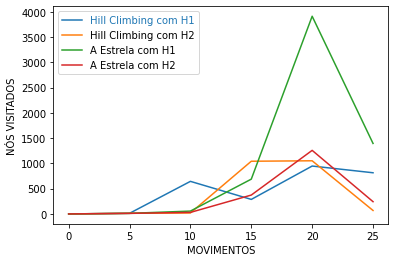

In [ ]:
################################################################################################################################
#                                                  CODIGO A GRAFICO
################################################################################################################################

from mpl_toolkits.axes_grid1 import host_subplot
import matplotlib.pyplot as plt

host = host_subplot(111)

host.set_xlabel("MOVIMENTOS")
host.set_ylabel("NÓS VISITADOS")


p1, = host.plot([0, 5, 10, 15, 20, 25], [0, 12, 644, 287, 947, 814], label="Hill Climbing com H1")
p2, = host.plot([0, 5, 10, 15, 20, 25], [0, 12, 19, 1042, 1051, 68], label="Hill Climbing com H2")
p3, = host.plot([0, 5, 10, 15, 20, 25], [0, 11, 56, 688, 3910, 1394], label="A Estrela com H1")
p4, = host.plot([0, 5, 10, 15, 20, 25], [0, 11, 30, 373, 1257, 242], label="A Estrela com H2")

leg = plt.legend()
leg.texts[0].set_color(p1.get_color())
plt.show()
    
